# Лабораторна робота №1.1
### Блінда Ірина Ігорівна ФІТ 4-4
### Тема: Візуалізація Matplotlib 


In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
# Завантажити файл Most Streamed Spotify Songs 2023
data = pd.read_csv("E:/University/completed_tasks/KSVD_completed/spotify-2023.csv", encoding="unicode_escape")
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


1. 1. Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

                                track_name                 artist(s)_name  \
574    Love Grows (Where My Rosemary Goes)              Edison Lighthouse   
33                               Anti-Hero                   Taylor Swift   
625                                 Arcade                Duncan Laurence   
253                          Glimpse of Us                           Joji   
455                         Seek & Destroy                            SZA   
98                      Summertime Sadness                   Lana Del Rey   
891  Come Back Home - From "Purple Hearts"                   Sofia Carson   
427                      Where Are You Now  Lost Frequencies, Calum Scott   
322                          I Love You So                    The Walters   
130                              Queencard                       (G)I-DLE   

     artist_count  released_year  released_month  released_day  \
574             1           1970               1             1   
33              1   

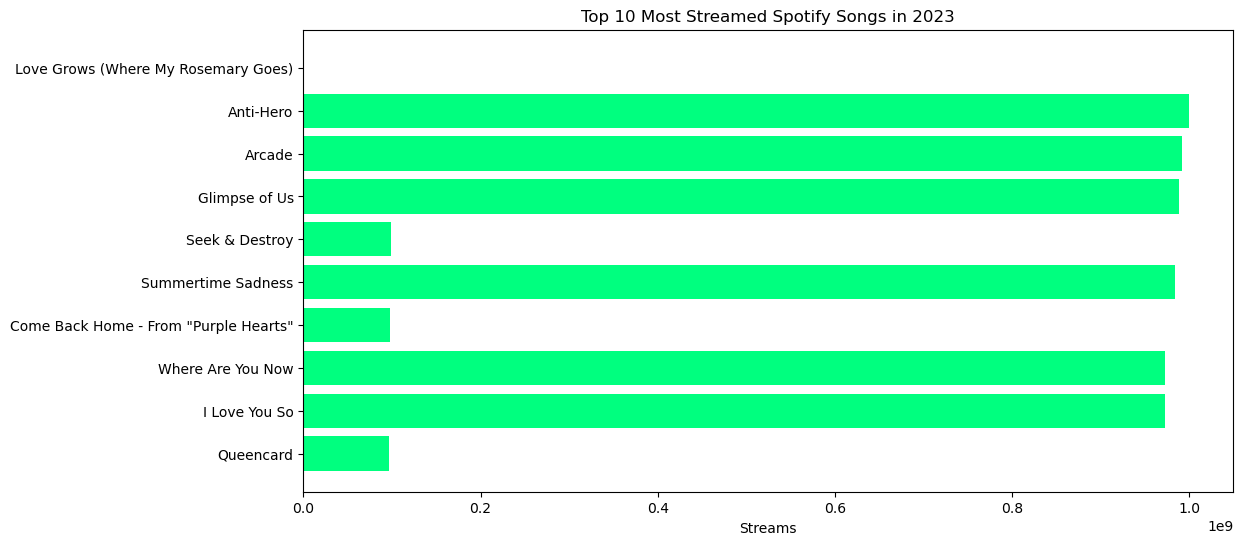

In [107]:
#  10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.
top_songs = data.sort_values(by='streams', ascending=False).head(10)
top_songs['streams'] = top_songs['streams'].str.extract('(\d+)').astype(float)
print(top_songs)
plt.figure(figsize=(12, 6))
plt.barh(top_songs['track_name'], top_songs['streams'], color='springgreen')
plt.xlabel('Streams')
plt.title('Top 10 Most Streamed Spotify Songs in 2023')
plt.gca().invert_yaxis()
plt.show()

1. 2. Побудувати кругову діаграму для тих самих даних.

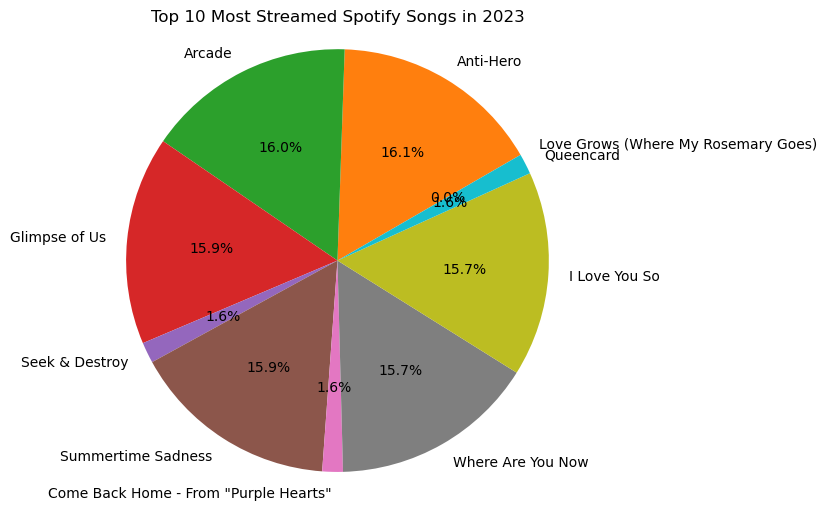

In [108]:
plt.figure(figsize=(6, 6))
plt.pie(top_songs['streams'], labels=top_songs['track_name'], autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top 10 Most Streamed Spotify Songs in 2023')
plt.show()

2. Створіть кругову діаграму або секторну діаграму, яка відображає розподіл за danceability серед найпопулярніших пісень у 2023 році.

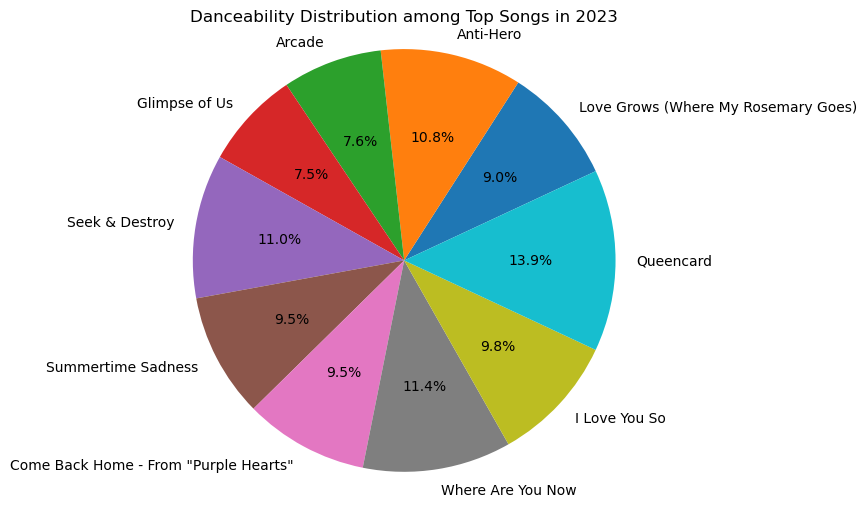

In [109]:
plt.figure(figsize=(6, 6))
plt.pie(top_songs['danceability_%'], labels=top_songs['track_name'], autopct='%1.1f%%', startangle=25)
plt.axis('equal')
plt.title('Danceability Distribution among Top Songs in 2023')
plt.show()

3. Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

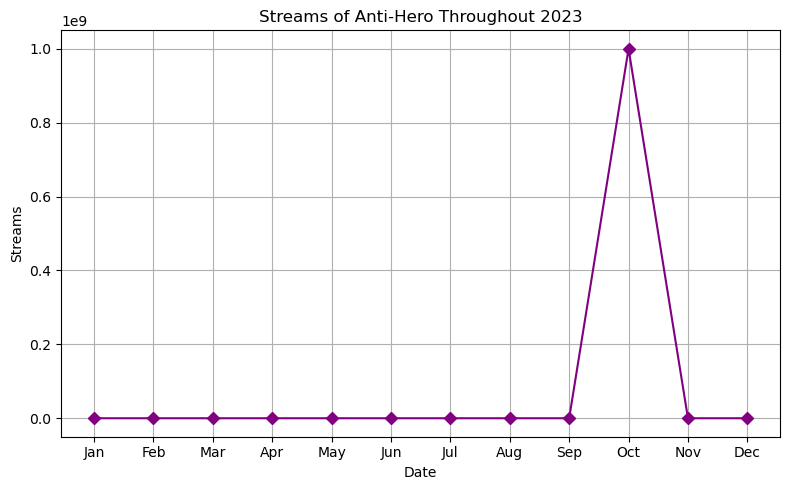

In [110]:
specific_track = data[data['track_name'] == 'Anti-Hero']
monthly_streams = specific_track.groupby(['released_month'])['streams'].sum()
months = list(range(1, 13))
monthly_streams = monthly_streams.reindex(months, fill_value=0)
plt.figure(figsize=(8, 5))
plt.plot(monthly_streams.index, monthly_streams.values, marker='D', linestyle='-', color="purple")
plt.xlabel('Date')
plt.ylabel('Streams')
plt.title('Streams of Anti-Hero Throughout 2023')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.grid(True)
plt.show()

4. Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

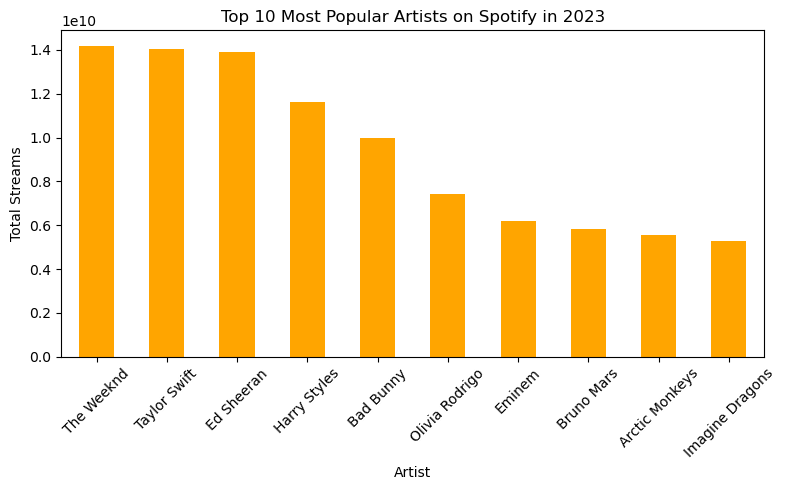

In [111]:
data['streams'] = data['streams'].str.extract('(\d+)').astype(float)
top_artists = data.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
if not pd.api.types.is_numeric_dtype(top_artists):
        top_artists = top_artists.astype(float)
top_artists.plot(kind='bar', color='orange')
plt.xlabel('Artist')
plt.ylabel('Total Streams')
plt.title('Top 10 Most Popular Artists on Spotify in 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

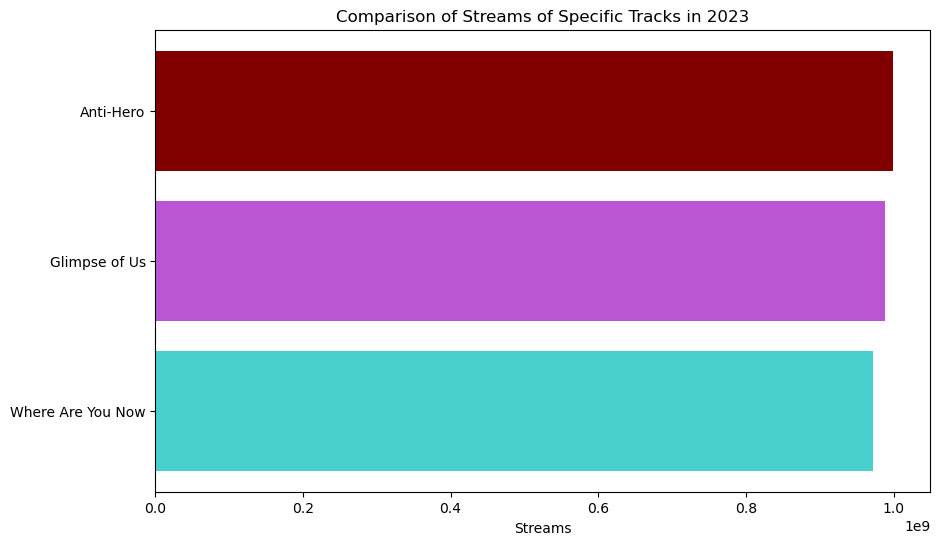

In [112]:
specific_tracks = data[data['track_name'].isin(['Anti-Hero', 'Glimpse of Us', 'Where Are You Now'])]
plt.figure(figsize=(10, 6))
plt.barh(specific_tracks['track_name'], specific_tracks['streams'], color=['maroon', 'mediumorchid', 'mediumturquoise'])
plt.xlabel('Streams')
plt.title('Comparison of Streams of Specific Tracks in 2023')
plt.gca().invert_yaxis()
plt.show()

### Висновок

У ході даної лобораторної роботи було виконано аналіз даних про найпопулярніші пісні та виконавців на Spotify у 2023 році, що вимагало виконання різноманітних завдань за допомогою візуалізації даних. Ось основні висновки з кожного завдання:

1. Для візуалізації 10 найпопулярніших пісень за кількістю прослуховувань була побудована горизонтальна стовпчикова діаграма, що надала зрозумілий огляд найбільш популярних треків у 2023 році.

2. Для візуалізації розподілу за danceability серед найпопулярніших пісень також була побудована кругова діаграма або секторна діаграма, що дозволило візуалізувати відсотковий розподіл цього параметру серед треків.

3. Для вивчення змін кількості прослуховувань певного треку протягом року 2023 року був побудований лінійний графік, що наглядно показав динаміку популярності цього треку протягом часу.

4. Для визначення найпопулярніших артистів за кількістю слухачів також була побудована стовпчикова діаграма, що надала інформацію про найбільш впливових виконавців у 2023 році.

5. Нарешті, для порівняння кількості прослуховувань трьох конкретних треків також була побудована горизонтальна стовпчикова діаграма, що надала зрозумілий порівняльний аналіз прослуховувань цих треків.

У результаті виконання цих завдань вдалося отримати важливі інсайти щодо популярності музичних треків та виконавців у 2023 році, що може бути корисним для подальшого аналізу та розуміння музичних тенденцій цього року.